<a href="https://colab.research.google.com/github/Ozziekins/ColabWorks/blob/main/Ass5.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### (A)

Recalling our matrix $A$ and $B$ as 
$$A = \begin{bmatrix}
0 & 0 & 1 & 0 \\
0 & 0 & 0 & 1 \\
0 & \frac{mg}{M} & 0 & 0 \\
0 & \frac{Mg + mg}{Ml} & 0 & 0
\end{bmatrix}, \hspace{10mm} B = \begin{bmatrix}
0 \\ 0 \\ \frac{1}{M} \\ \frac{1}{Ml}
\end{bmatrix}$$

and now having $C$ and $D$ to be
$$C = \begin{bmatrix}
1 & 0 & 0 & 0 \\
0 & 1 & 0 & 0
\end{bmatrix}, \hspace{10mm} D = \begin{bmatrix}
0 \\ 0
\end{bmatrix}$$

We want to calculate the rank of the observability matrix
$$ \Omega = \begin{bmatrix}C \\ CA \\ CA^2 \\ CA^3 \end{bmatrix} = \begin{bmatrix}
1 & 0 & 0 & 0 \\
0 & 1 & 0 & 0 \\
0 & 0 & 1 & 0 \\
0 & 0 & 0 & 1 \\
0 & 5.92301887 & 0 & 0 \\
0 & 13.68088597 & 0 & 0 \\
0 & 0 & 0 & 5.92301887 \\
0 & 0 & 0 & 13.68088597
\end{bmatrix}$$

In [ ]:
import numpy as np
import math
from numpy.linalg import eig

M = 5.3
m = 3.2
g = 9.81
l = 1.15

c1 = (m*g)/M
c2 = (M*g + m*g)/(M*l)
c5 = 1/M
c6 = 1/(M*l)

A = np.array([[0, 0, 1, 0], [0, 0, 0, 1], [0, c1, 0, 0], [0, c2, 0, 0]])
B = np.array([[0], [0], [c5], [c6]])
C = np.array([[1, 0, 0, 0], [0, 1, 0, 0]])
D = np.array([0])

A2 = np.dot(A,A)
A3 = np.dot(A2,A)

CA = np.dot(C,A)
C_A2 = np.dot(C,A2)
C_A3 = np.dot(C,A3)

print("C = ", C)
print("CA = ", CA)
print("C_A2 = ", C_A2)
print("C_A3 = ", C_A3)

C =  [[1 0 0 0]
 [0 1 0 0]]
CA =  [[0. 0. 1. 0.]
 [0. 0. 0. 1.]]
C_A2 =  [[ 0.          5.92301887  0.          0.        ]
 [ 0.         13.68088597  0.          0.        ]]
C_A3 =  [[ 0.          0.          0.          5.92301887]
 [ 0.          0.          0.         13.68088597]]


In [ ]:

Omega = np.array([[1, 0, 0, 0],
[0, 1, 0, 0],
[0, 0, 1, 0],
[0, 0, 0, 1],
[0, 5.92301887, 0, 0],
[0, 13.68088597, 0, 0],
[0, 0, 0, 5.92301887],
[0, 0, 0, 13.68088597]])
rank = np.linalg.matrix_rank(Omega)

print("Omega = ")
print(Omega)
print("The rank of the observable matrix is :", rank)

Omega = 
[[ 1.          0.          0.          0.        ]
 [ 0.          1.          0.          0.        ]
 [ 0.          0.          1.          0.        ]
 [ 0.          0.          0.          1.        ]
 [ 0.          5.92301887  0.          0.        ]
 [ 0.         13.68088597  0.          0.        ]
 [ 0.          0.          0.          5.92301887]
 [ 0.          0.          0.         13.68088597]]
The rank of the observable matrix is : 4


We see that the rank of matrix $\Omega$ is 4 which is the full rank, hence the system is **observable**.

### (B)
To find the eigenvalues of the matrix $A = \begin{bmatrix}
0 & 0 & 1 & 0 \\
0 & 0 & 0 & 1 \\
0 & 5.92301887 & 0 & 0 \\
0 & 13.68088597 & 0 & 0
\end{bmatrix}$

In [ ]:
e, v = np.linalg.eig(A)
print("A = ", A)
print("eigenvalues of A are: ", e)

A =  [[ 0.          0.          1.          0.        ]
 [ 0.          0.          0.          1.        ]
 [ 0.          5.92301887  0.          0.        ]
 [ 0.         13.68088597  0.          0.        ]]
eigenvalues of A are:  [ 0.          0.          3.69876817 -3.69876817]


We can see that one of the eigenvalues neither has *negative real part*, hence the system is **not stable**.

## Pole-placement

L_trans =  [[13.0015444   1.33178893 30.07099958  6.38271128]
 [-0.66512226 14.9984556   4.31808537 63.7209975 ]]
L = [[13.0015444  -0.66512226]
 [ 1.33178893 14.9984556 ]
 [30.07099958  4.31808537]
 [ 6.38271128 63.7209975 ]]


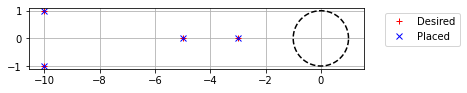

In [ ]:
from scipy import signal, misc
import matplotlib.pyplot as plt

C_trans = np.transpose(C)
A_trans = np.transpose(A)
P = [-10+1j, -10-1j, -5, -3]
fsf = signal.place_poles(A_trans, C_trans, P, method='YT')

print("L_trans = ", fsf.gain_matrix)
print("L =", np.transpose(fsf.gain_matrix))

t = np.linspace(0, 2*np.pi, 401)
plt.plot(np.cos(t), np.sin(t), 'k--')  # unit circle
plt.plot(fsf.requested_poles.real, fsf.requested_poles.imag, 'r+', label='Desired')
plt.plot(fsf.computed_poles.real, fsf.computed_poles.imag, 'bx', label='Placed')
plt.grid()
plt.axis('image')
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, numpoints=1)
plt.show()

To confirm, $$L^T = \begin{bmatrix}
13.0015444 & 1.33178893 & 30.07099958 & 6.38271128 \\
-0.66512226 & 14.9984556 & 4.31808537 & 63.7209975
\end{bmatrix}$$ 

Which gives

$$ L = \begin{bmatrix} 13.0015444 & -0.66512226 \\
1.33178893 & 14.9984556 \\
30.07099958 & 4.31808537 \\
6.38271128 & 63.7209975 \end{bmatrix}$$
gives us what we want, we calculate the eigenvalues for $A-LC$

In [ ]:
L_trans = np.array(fsf.gain_matrix)
L = np.transpose(L_trans)
LC = np.dot(L,C)
A_LC = np.subtract(A,LC)
e_, v_ = np.linalg.eig(A_LC)
print("A-LC = ", A_LC)
print("\n eigenvalues of A-LC are: ", e_)

A-LC =  [[-13.0015444    0.66512226   1.           0.        ]
 [ -1.33178893 -14.9984556    0.           1.        ]
 [-30.07099958   1.6049335    0.           0.        ]
 [ -6.38271128 -50.04011153   0.           0.        ]]

 eigenvalues of A-LC are:  [-10.+1.j -10.-1.j  -3.+0.j  -5.+0.j]


We see that the eigenvalues are exactly the same as the poles we chose, which means that L is right. 


## LQR

In [ ]:
# !pip3 install slycot
# !pip3 install control

import control
from control.matlab import *

Q = np.eye(4)
R = np.eye(2)

#for random Q and R, you may comment the Q and R above and uncomment the next two lines
# Q = np.random.randint(500, size=(4, 4))
# R = np.random.randint(500, size=(2, 2))

#obtain L_trans -State feedback gains, S- Solution to Riccati equation and E - Eigenvalues of the closed loop system
LTrans, S, E = control.lqr(A_trans, C_trans, Q, R)

print("LTrans from lqr: ", LTrans)
print("L: ", np.transpose(LTrans))
print("\n Eigenvalues of the closed-loop system: ", E)

LTrans from lqr:  [[ 2.3277239   1.88920263  3.99369256  7.11088135]
 [ 1.88920263  6.94647117 10.40995237 25.41127418]]
L:  [[ 2.3277239   1.88920263]
 [ 1.88920263  6.94647117]
 [ 3.99369256 10.40995237]
 [ 7.11088135 25.41127418]]

 Eigenvalues of the closed-loop system:  [-4.2469983+0.j         -3.183831 +0.j         -0.9216828+0.50547135j
 -0.9216828-0.50547135j]


And for this we have $L$ to be: 
$$L^T = \begin{bmatrix}
2.3277239 & 1.88920263 & 3.99369256 & 7.11088135\\
1.88920263 & 6.94647117 & 10.40995237 & 25.41127418
\end{bmatrix}$$

Which gives

$$L = \begin{bmatrix} 2.3277239  & 1.88920263\\
1.88920263 & 6.94647117 \\
 3.99369256 & 10.40995237 \\
 7.11088135 & 25.41127418 \end{bmatrix}$$

## State feedback controller

In [ ]:
poles = [-0.1+0.5j , -0.1-0.5j, -0.5 , -0.78]
K = acker(A, B, poles)

print(K)

[[-6.30003058e-02  8.89795204e+01 -2.55232008e-01  9.31411681e+00]]


To confirm that $$K = \begin{bmatrix}
-6.30003058e-02 & 8.89795204e+01 & -2.55232008e-01 & 9.31411681e+00
\end{bmatrix}  $$
gives us what we want, we calculate the eigenvalues for $A-BK$

In [ ]:
BK = np.dot(B,K)
A_BK = np.subtract(A,BK)
eigV, v_ = np.linalg.eig(A_BK)
print("A-LC = ", A_BK)
print("\n eigenvalues of A-LC are: ", eigV)

A-LC =  [[ 0.00000000e+00  0.00000000e+00  1.00000000e+00  0.00000000e+00]
 [ 0.00000000e+00  0.00000000e+00  0.00000000e+00  1.00000000e+00]
 [ 1.18868502e-02 -1.08655699e+01  4.81569827e-02 -1.75738053e+00]
 [ 1.03363914e-02 -9.17886850e-01  4.18756371e-02 -1.52815698e+00]]

 eigenvalues of A-LC are:  [-0.1 +0.5j -0.1 -0.5j -0.78+0.j  -0.5 +0.j ]


We see that the eigenvalues are exactly the same as the poles we chose, which means that K is right. 


## System with Luenberger observer and state feedback controller

Simulate nonlinear system with Luenberger observer and state feedback controller that uses estimated states $(u = -K\hat{z})$. Make sure that the system is stabilized for various initial conditions around $\bar{z}$.

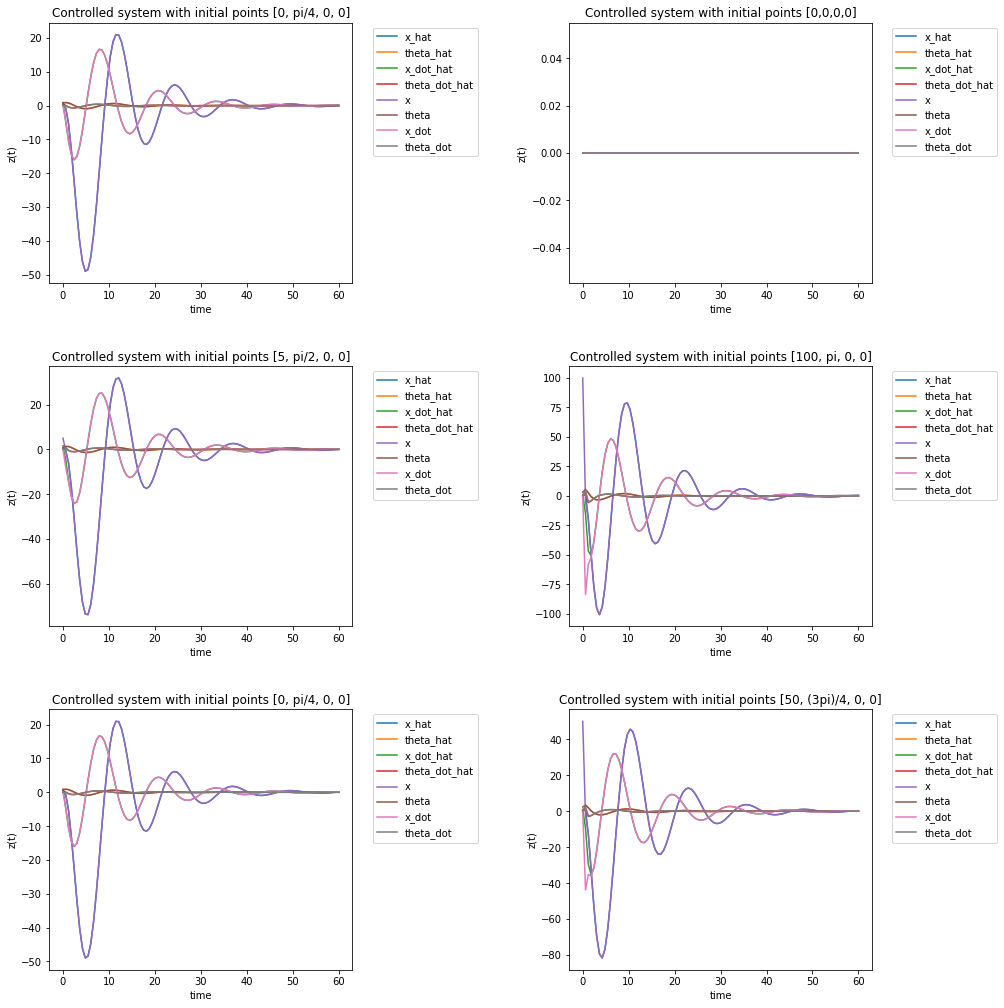

In [ ]:
from scipy.integrate import odeint

B_ = np.array([0, 0, c5, c6])

K = np.array([[-6.30003058e-02,  8.89795204e+01, -2.55232008e-01,  9.31411681e+00]])
L = np.array([[13.0015444,  -0.66512226],
 [ 1.33178893, 14.9984556 ],
 [30.07099958,  4.31808537],
 [ 6.38271128, 63.7209975 ]])

z = [0,0,0,0]

def no_control(z_hat, t):
    z_dot = A.dot(z)
    return z_dot

def nonlinear_system(observer_and_controller, t):
    z = observer_and_controller[0:4]
    z_hat = observer_and_controller[-4:]
    u = -K.dot(z_hat)
    e = C.dot(z) - C.dot(z_hat)
    z_dot = A.dot(z) + B_*u
    z_hat_dot = A.dot(z_hat) + B_*u + L.dot(e)
    return np.concatenate((z_dot, z_hat_dot),0)

first_cond = [0,0,0,0]
second_cond = [5, math.pi/2, 0, 0]
third_cond = [100, math.pi, 0, 0]
fourth_cond = [0, math.pi/4, 0, 0]
fifth_cond = [50, (3*math.pi)/4, 0, 0]

time = np.linspace(0, 60, 100)
z0 = np.random.rand(4)          #initial points for no control
z1 = np.array(np.concatenate((first_cond,first_cond),0))       #first initial points
z2 = np.array(np.concatenate((z0,second_cond),0))      #second initial points
z3 = np.array(np.concatenate((z0,third_cond),0))       #third initial points
z4 = np.array(np.concatenate((z0,fourth_cond),0))      #fourth initial points
z5 = np.array(np.concatenate((z0,fifth_cond),0))       #fifth initial points

solution = odeint(no_control, z0, time)
solution1 = odeint(nonlinear_system, z1, time)
solution2 = odeint(nonlinear_system, z2, time)
solution3 = odeint(nonlinear_system, z3, time)
solution4 = odeint(nonlinear_system, z4, time)
solution5 = odeint(nonlinear_system, z5, time)

#plots
fig, axs = plt.subplots(3, 2, figsize=(15,15))

# lines = axs[0,0].plot(time, solution)
# axs[0,0].set_title('System with no control')
# axs[0,0].legend(lines[:4], ['x', 'theta', 'x_dot', 'theta_dot','x_hat'], bbox_to_anchor=(1.05, 1), loc=2, numpoints=1)

lines = axs[0,0].plot(time, solution4)
axs[0,0].set_title('Controlled system with initial points [0, pi/4, 0, 0]')
axs[0,0].legend(lines[:8], ['x_hat', 'theta_hat', 'x_dot_hat', 'theta_dot_hat','x', 'theta', 'x_dot', 'theta_dot'], bbox_to_anchor=(1.05, 1), loc=2, numpoints=1)

lines = axs[0,1].plot(time, solution1)
axs[0,1].set_title('Controlled system with initial points [0,0,0,0]')
axs[0,1].legend(lines[:8], ['x_hat', 'theta_hat', 'x_dot_hat', 'theta_dot_hat','x', 'theta', 'x_dot', 'theta_dot'], bbox_to_anchor=(1.05, 1), loc=2, numpoints=1)

lines = axs[1,0].plot(time, solution2)
axs[1,0].set_title('Controlled system with initial points [5, pi/2, 0, 0]')
axs[1,0].legend(lines[:8], ['x_hat', 'theta_hat', 'x_dot_hat', 'theta_dot_hat','x', 'theta', 'x_dot', 'theta_dot'], bbox_to_anchor=(1.05, 1), loc=2, numpoints=1)

lines = axs[1,1].plot(time, solution3)
axs[1,1].set_title('Controlled system with initial points [100, pi, 0, 0]')
axs[1,1].legend(lines[:8], ['x_hat', 'theta_hat', 'x_dot_hat', 'theta_dot_hat','x', 'theta', 'x_dot', 'theta_dot'], bbox_to_anchor=(1.05, 1), loc=2, numpoints=1)

lines = axs[2,0].plot(time, solution4)
axs[2,0].set_title('Controlled system with initial points [0, pi/4, 0, 0]')
axs[2,0].legend(lines[:8], ['x_hat', 'theta_hat', 'x_dot_hat', 'theta_dot_hat','x', 'theta', 'x_dot', 'theta_dot'], bbox_to_anchor=(1.05, 1), loc=2, numpoints=1)

lines = axs[2,1].plot(time, solution5)
axs[2,1].set_title('Controlled system with initial points [50, (3pi)/4, 0, 0]')
axs[2,1].legend(lines[:8], ['x_hat', 'theta_hat', 'x_dot_hat', 'theta_dot_hat','x', 'theta', 'x_dot', 'theta_dot'], bbox_to_anchor=(1.05, 1), loc=2, numpoints=1)

fig.tight_layout(pad=5.0)

for ax in axs.flat:
    ax.set(xlabel='time', ylabel='z(t)')

We see that no matter the initial condition, it always stabilizes.

Odeint doesn't properly solve the system with the addition of noise, so the function below is to help **try** to solve after adding noise.

In [ ]:
def solve(func, x, time):
    Count = time.shape[0]

    n_runge = x.shape[0];
    # print("n_runge", n_runge)

    y = zeros((Count, n_runge))
    y[0, :] = x
    
    for i in range(1, Count-1):
        
        dt = time[i] - time[i-1]
        
        dx1 = func(x, time[i])
        dx2 = func(x+0.5*dx1*dt, time[i]+dt/2)
        dx3 = func(x+0.5*dx2*dt, time[i]+dt/2)
        dx4 = func(x+    dx3*dt, time[i]+dt)
        
        dx = (dx1 + 2*dx2 + 2*dx3 + dx4) / 6
        x = x + dx*dt
        
        y[i, :] = x
        
    return y

## White gaussian noise
Add white gaussian noise to the output $(\delta y = C\delta z + v)$.

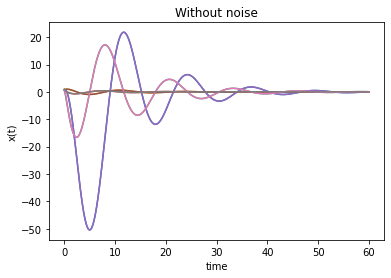

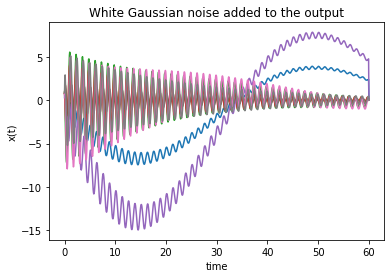

In [ ]:
from scipy.integrate import odeint
from numpy import ones, eye, zeros, real

B_ = np.array([0, 0, c5, c6])

K = np.array([[-6.30003058e-02,  8.89795204e+01, -2.55232008e-01,  9.31411681e+00]])
L = np.array([[13.0015444,  -0.66512226],
 [ 1.33178893, 14.9984556 ],
 [30.07099958,  4.31808537],
 [ 6.38271128, 63.7209975 ]])

def awgn(s):
    noise = s + np.random.randn(4,)*0.15
    return noise[0:2]

def system(observer_and_controller, t):
    z = observer_and_controller[0:4]
    z_hat = observer_and_controller[-4:]
    u = -K.dot(z_hat)
    e = C.dot(z) - C.dot(z_hat)
    z_dot = A.dot(z) + B_*u
    z_hat_dot = A.dot(z_hat) + B_*u + L.dot(e)
    return np.concatenate((z_dot, z_hat_dot),0)

def nonlinear_system(observer_and_controller, t):
    zz = observer_and_controller[0:4]
    z_hat = observer_and_controller[-4:]
    v = awgn(zz)
    u = -K.dot(z_hat)
    y = C.dot(zz) + v
    e = y - C.dot(z_hat)
    z_dot = A.dot(zz) + B_*u
    z_hat_dot = A.dot(z_hat) + B_*u + L.dot(e)
    return np.concatenate((z_dot, z_hat_dot),0)

time = np.linspace(0, 60, 1000)

z0 = np.random.rand(4)
z1 = np.random.rand(4)

#solutions with the random initial points
solution = solve(system,  np.concatenate((z0,z1),0), time)
solution1 = solve(nonlinear_system, np.concatenate((z0,z1),0), time)

#plots
lines = plt.plot(time, solution)
plt.title('Without noise')
# plt.legend(lines[:8], ['x', 'theta', 'x_dot', 'theta_dot','x_hat', 'theta_hat', 'x_dot_hat', 'theta_dot_hat'], bbox_to_anchor=(1.05, 1), loc=2, numpoints=1)
plt.xlabel('time')
plt.ylabel('x(t)')
plt.show()

lines = plt.plot(time, solution1)
plt.title('White Gaussian noise added to the output')
# plt.legend(lines[:8], ['x', 'theta', 'x_dot', 'theta_dot','x_hat', 'theta_hat', 'x_dot_hat', 'theta_dot_hat'], bbox_to_anchor=(1.05, 1), loc=2, numpoints=1)
plt.xlabel('time')
plt.ylabel('x(t)')
plt.show()

## White gaussian noise
Add white gaussian noise to the dynamics ($\delta \dot{z} = A\delta z + B\delta u + w$).

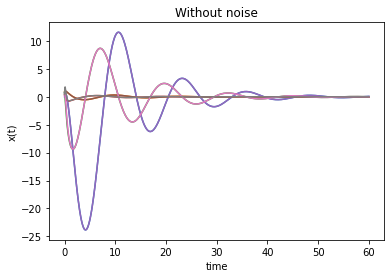

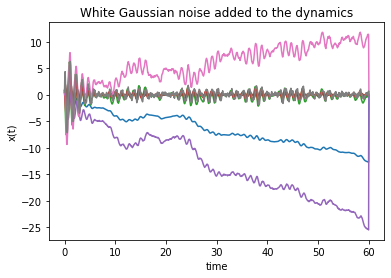

In [ ]:
from scipy.integrate import odeint
from numpy import ones, eye, zeros, real

B_ = np.array([0, 0, c5, c6])

K = np.array([[-6.30003058e-02,  8.89795204e+01, -2.55232008e-01,  9.31411681e+00]])
L = np.array([[13.0015444,  -0.66512226],
 [ 1.33178893, 14.9984556 ],
 [30.07099958,  4.31808537],
 [ 6.38271128, 63.7209975 ]])

def awgn(s):
    noise = s + np.random.randn(4,)*0.15
    return noise

def awgn2(s):
    noise = s + np.random.randn(4,)*0.15
    return noise[0:2]

def system(observer_and_controller, t):
    z = observer_and_controller[0:4]
    z_hat = observer_and_controller[-4:]
    u = -K.dot(z_hat)
    e = C.dot(z) - C.dot(z_hat)
    z_dot = A.dot(z) + B_*u
    z_hat_dot = A.dot(z_hat) + B_*u + L.dot(e)
    return np.concatenate((z_dot, z_hat_dot),0)

def nonlinear_system(observer_and_controller, t):
    zz = observer_and_controller[0:4]
    z_hat = observer_and_controller[-4:]
    v = awgn2(zz)
    w = awgn(zz)
    u = -K.dot(z_hat)
    y = C.dot(zz) + v
    e = y - C.dot(z_hat)
    z_dot = A.dot(zz) + B_*u
    z_hat_dot = A.dot(z_hat) + B_*u + w + L.dot(e)
    return np.concatenate((z_dot, z_hat_dot),0)

time = np.linspace(0, 60, 1000)

z0 = np.random.rand(4)
z1 = np.random.rand(4)

#solutions with the random initial points
solution = odeint(system,  np.concatenate((z0,z1),0), time)
solution1 = solve(nonlinear_system, np.concatenate((z0,z1),0), time)

#plots
lines = plt.plot(time, solution)
plt.title('Without noise')
# plt.legend(lines[:8], ['x', 'theta', 'x_dot', 'theta_dot','x_hat', 'theta_hat', 'x_dot_hat', 'theta_dot_hat'], bbox_to_anchor=(1.05, 1), loc=2, numpoints=1)
plt.xlabel('time')
plt.ylabel('x(t)')
plt.show()

lines = plt.plot(time, solution1)
plt.title('White Gaussian noise added to the dynamics')
# plt.legend(lines[:8], ['x', 'theta', 'x_dot', 'theta_dot','x_hat', 'theta_hat', 'x_dot_hat', 'theta_dot_hat'], bbox_to_anchor=(1.05, 1), loc=2, numpoints=1)
plt.xlabel('time')
plt.ylabel('x(t)')
plt.show()

## Kalman filter
### Prediction Step 
This step has to predict the mean X and the covariance P of the system state at the time  step k.  The  Python  function kf_predict  performs  the  prediction  of  these output (X and P) when giving six input:  

1.   X: The mean state estimate of the previous step (1k−).
2.   P: The state covariance of previous step (1k−). 
3. A: The transition nxn matrix. 
4. Q: The process noise covariance matrix. 
5. B: The input effect matrix. 
6. U: The control input. 


In [ ]:
from numpy import dot 

def kf_predict(X, P, A, Q, B, U):
  X = dot(A, X) + dot(B, U)
  P = dot(A, dot(P, A.T)) + Q
  return(X,P)

### Update Step
At the time step k, this update step computes the posterior mean X and covariance P of the system state given a new measurement Y. The Python function kf_update performs  the  update  of X  and P  giving  the  predicted X  and P  matrices,  the measurement vector Y, the measurement matrix Hand the measurement covariance matrix R. The additional input will be:

1.   K: the Kalman Gain matrix 
2. IM: the Mean of predictive distribution of Y 
3.  IS: the Covariance or predictive mean of Y 
4. LH:   the   Predictive   probability

In [ ]:
from numpy import dot, sum, tile, linalg 
from numpy.linalg import inv

def kf_update(X, P, Y, H, R):
  IM = dot(H, X)
  IS = R + dot(H, dot(P, H.T))
  K = dot(P, dot(H.T, inv(IS)))
  X = X + dot(K, (Y-IM))
  P = P - dot(K, dot(IS, K.T))
  LH = gauss_pdf(Y, IM, IS)
  return (X,P,K,IM,IS,LH)  
  
def gauss_pdf(X, M, S):
  if M.shape()[1] == 1:
    DX = X - tile(M, X.shape()[1])
    E = 0.5 * sum(DX * (dot(inv(S), DX)), axis=0)
    E = E + 0.5 * M.shape()[0] * log(2 * pi) + 0.5 * log(det(S))
    P = exp(-E)
  elif X.shape()[1] == 1:
      DX = tile(X, M.shape()[1])- M
      E = 0.5 * sum(DX * (dot(inv(S), DX)), axis=0)
      E = E + 0.5 * M.shape()[0] * log(2 * pi) + 0.5 * log(det(S))
      P = exp(-E)
  else:
      DX = X-M 
      E = 0.5 * dot(DX.T, dot(inv(S), DX))
      E = E + 0.5 * M.shape()[0] * log(2 * pi) + 0.5 * log(det(S))
      P = exp(-E)
  return (P[0],E[0])  


### Reference
Laaraiedh, Mohamed. (2012). Implementation of Kalman Filter with Python Language. 

In [ ]:
# # Kalman filter example demo in Python

# # A Python implementation of the example given in pages 11-15 of "An
# # Introduction to the Kalman Filter" by Greg Welch and Gary Bishop,
# # University of North Carolina at Chapel Hill, Department of Computer
# # Science, TR 95-041,
# # https://www.cs.unc.edu/~welch/media/pdf/kalman_intro.pdf

# # by Andrew D. Straw

# import numpy as np
# import matplotlib.pyplot as plt

# plt.rcParams['figure.figsize'] = (10, 8)

# # intial parameters
# n_iter = 50
# sz = (n_iter,) # size of array
# x = -0.37727 # truth value (typo in example at top of p. 13 calls this z)
# z = np.random.normal(x,0.1,size=sz) # observations (normal about x, sigma=0.1)

# Q = 1e-5 # process variance

# # allocate space for arrays
# xhat=np.zeros(sz)      # a posteri estimate of x
# P=np.zeros(sz)         # a posteri error estimate
# xhatminus=np.zeros(sz) # a priori estimate of x
# Pminus=np.zeros(sz)    # a priori error estimate
# K=np.zeros(sz)         # gain or blending factor

# R = 0.1**2 # estimate of measurement variance, change to see effect

# # intial guesses
# xhat[0] = 0.0
# P[0] = 1.0

# for k in range(1,n_iter):
#     # time update
#     xhatminus[k] = xhat[k-1]
#     Pminus[k] = P[k-1]+Q

#     # measurement update
#     K[k] = Pminus[k]/( Pminus[k]+R )
#     xhat[k] = xhatminus[k]+K[k]*(z[k]-xhatminus[k])
#     P[k] = (1-K[k])*Pminus[k]

# plt.figure()
# plt.plot(z,'k+',label='noisy measurements')
# plt.plot(xhat,'b-',label='a posteri estimate')
# plt.axhline(x,color='g',label='truth value')
# plt.legend()
# plt.title('Estimate vs. iteration step', fontweight='bold')
# plt.xlabel('Iteration')
# plt.ylabel('Voltage')

# plt.figure()
# valid_iter = range(1,n_iter) # Pminus not valid at step 0
# plt.plot(valid_iter,Pminus[valid_iter],label='a priori error estimate')
# plt.title('Estimated $\it{\mathbf{a \ priori}}$ error vs. iteration step', fontweight='bold')
# plt.xlabel('Iteration')
# plt.ylabel('$(Voltage)^2$')
# plt.setp(plt.gca(),'ylim',[0,.01])
# plt.show()